# Laboratorium 7: Szkieletowanie z wykorzystaniem operacji morfologicznych

**Politechnika Świętokrzyska**  
**Centrum Laserowych Technologii Metali**  
**Automatyka i Robotyka - 2 semestr II stopnia**

---

## Spis treści
1. [Teoria](#teoria)
2. [Kod startowy](#kod-startowy)
3. [Zadania do wykonania](#zadania)
4. [Przykłady użycia](#przyklady)
5. [Podsumowanie](#podsumowanie)


## 1. Teoria <a id='teoria'></a>

### 1.1 Wprowadzenie do szkieletowania

**Szkieletowanie** (ang. *skeletonization*) to operacja morfologiczna mająca na celu uproszczenie reprezentacji kształtu obiektu poprzez redukcję go do linii o grubości jednego piksela, zachowując przy tym topologię i ogólny kształt obiektu.

**Zastosowania:**
- Rozpoznawanie znaków (OCR)
- Analiza kształtu obiektów
- Ekstrakcja cech geometrycznych
- Planowanie ścieżek w robotyce
- Analiza sieci (naczynia krwionośne, drogi)

**Właściwości dobrego szkieletu:**
- Cienki (grubość 1 piksela)
- Spójny (zachowuje łączność)
- Centralny (przebiega przez środek obiektu)
- Odwracalny (możliwość rekonstrukcji)

### 1.2 Algorytm szkieletowania przez operacje morfologiczne

Szkielet można obliczyć za pomocą iteracyjnych operacji morfologicznych. Algorytm wykorzystuje:
- **Erozję** - zmniejszanie obiektu
- **Otwarcie** - erozja + dylatacja
- **Różnicę** - wydobycie warstwy obiektu

#### Wzór na szkielet:

$$S(A) = \bigcup_{k=0}^{M} S_k(A)$$

gdzie:

$$S_k(A) = (A \ominus kB) - [(A \ominus kB) \circ B]$$

**Oznaczenia:**
- $A$ - obraz binarny (obiekt)
- $B$ - element strukturalny
- $A \ominus kB$ - $k$-krotna erozja obrazu $A$ elementem $B$
- $(A \ominus kB) \circ B$ - otwarcie obrazu po $k$ erozjach
- $S_k(A)$ - $k$-ty składnik szkieletu
- $M$ - maksymalna liczba erozji (do momentu zaniku obiektu)

### 1.3 Algorytm iteracyjny (uproszczony)

Alternatywna wersja algorytmu, która nie wymaga przechowywania wszystkich składników:

```
1. Inicjalizacja:
   - skeleton = pusty obraz
   - eroded = kopia obrazu oryginalnego

2. Dopóki eroded nie jest pusty:
   a) opened = otwarcie(eroded)
   b) component = eroded - opened
   c) skeleton = skeleton + component
   d) eroded = erozja(eroded)

3. Zwróć skeleton
```

### 1.4 Operacje na obrazach binarnych

#### Odejmowanie obrazów

Operacja różnicy (odejmowania) obrazów binarnych:

$$C(x,y) = \max(0, A(x,y) - B(x,y))$$

lub dla obrazów binarnych (0/255):

$$C(x,y) = \begin{cases} 
255 & \text{jeśli } A(x,y) = 255 \text{ i } B(x,y) = 0 \\
0 & \text{w przeciwnym przypadku}
\end{cases}$$

**Interpretacja:** Wynik zawiera piksele, które są w obrazie A, ale nie ma ich w obrazie B.

#### Dodawanie obrazów

Operacja sumy (dodawania) obrazów binarnych:

$$C(x,y) = \min(255, A(x,y) + B(x,y))$$

lub dla obrazów binarnych (logiczne OR):

$$C(x,y) = A(x,y) \lor B(x,y)$$

**Interpretacja:** Wynik zawiera piksele, które są w obrazie A lub w obrazie B (lub w obu).

### 1.5 Interpretacja algorytmu

Algorytm działa w następujący sposób:

1. **Iteracyjna erozja**: Obiekt jest stopniowo "obierany" z kolejnych warstw
2. **Otwarcie**: Dla każdej warstwy wykonywane jest otwarcie morfologiczne
3. **Różnica**: Różnica między erodowanym obrazem a jego otwarciem daje fragment szkieletu
4. **Suma**: Wszystkie fragmenty są sumowane, tworząc kompletny szkielet

**Wizualizacja procesu:**

```
Iteracja 0:  Obiekt oryginalny → otwarcie → różnica → składnik_0
             ↓ erozja
Iteracja 1:  Obiekt mniejszy → otwarcie → różnica → składnik_1
             ↓ erozja
Iteracja 2:  Obiekt jeszcze mniejszy → otwarcie → różnica → składnik_2
             ↓ erozja
             ...
Iteracja M:  Obiekt znika (pusty)

Szkielet = składnik_0 + składnik_1 + składnik_2 + ... + składnik_M
```

### 1.6 Rekonstrukcja z szkieletu

Jedną z kluczowych właściwości szkieletowania jest **odwracalność** - możliwość odzyskania oryginalnego obiektu ze szkieletu.

#### Wzór na rekonstrukcję:

$$A = \bigcup_{k=0}^{M} (S_k(A) \oplus kB)$$

gdzie:
- $S_k(A) \oplus kB$ - $k$-krotna dylatacja $k$-tego składnika szkieletu

### 1.7 Przykłady szkieletów dla różnych kształtów

**Prostokąt:**
- Szkielet to linia środkowa (oś symetrii)
- Dla kwadratu: dwie przekątne

**Prostokąt z pustym obszarem wewnątrz (rama):**
- Szkielet składa się z dwóch równoległych linii
- Reprezentuje środki ścian ramy

**Okrąg:**
- Szkielet to pojedynczy punkt w środku

**Pierścień (okrąg z dziurą):**
- Szkielet to okrąg pośrodku grubości pierścienia

**Kształt człowieka:**
- Szkielet przypomina "patyczaka"
- Linie reprezentują tułów, ręce i nogi

---


### 1.3 Graficzne przedstawienie działania algorytmu

Poniższa wizualizacja pokazuje **krok po kroku**, jak działa algorytm szkieletowania przez operacje morfologiczne. Jest to dokładna implementacja schematu z instrukcji PDF (tw_cw7.pdf).

#### Interpretacja kolumn:

| Kolumna | Oznaczenie | Opis |
|---------|------------|------|
| 1 | $A \ominus kB$ | Obiekt po $k$ erozjach (stopniowe "obieranie" obiektu) |
| 2 | $(A \ominus kB) \circ B$ | Otwarcie po $k$ erozjach ("wygładzona" wersja) |
| 3 | $S_k(A)$ | $k$-ty składnik szkieletu = różnica kolumn 1 i 2 |
| 4 | $\bigcup_{i=0}^{k} S_i(A)$ | Szkielet narastający (suma wszystkich składników do tej pory) |
| 5 | $S_k(A) \oplus kB$ | Rekonstrukcja z pojedynczego $k$-tego składnika |
| 6 | $\bigcup_{i=0}^{k} (S_i(A) \oplus iB)$ | Rekonstrukcja obiektu ze szkieletu (suma wszystkich rekonstrukcji) |

#### Interpretacja wierszy:

- **k = 0**: Obiekt oryginalny (bez erozji)
- **k = 1**: Po pierwszej erozji
- **k = 2**: Po drugiej erozji (obiekt znika)

#### Kluczowe obserwacje:

1. **Kolumna 4** (czarna) pokazuje, jak powstaje **szkielet** - suma wszystkich składników
2. **Kolumna 6** pokazuje, jak ze szkieletu można **odzyskać oryginalny obiekt**
3. Algorytm kończy się, gdy obiekt po erozji staje się pusty (wiersz k=2)
4. Każdy wiersz dodaje nową "warstwę" do szkieletu

---


Wizualizacja algorytmu szkieletowania (jak w instrukcji PDF):
Obraz testowy: (9, 7), 35 białych pikseli
Element strukturalny: krzyż 3×3



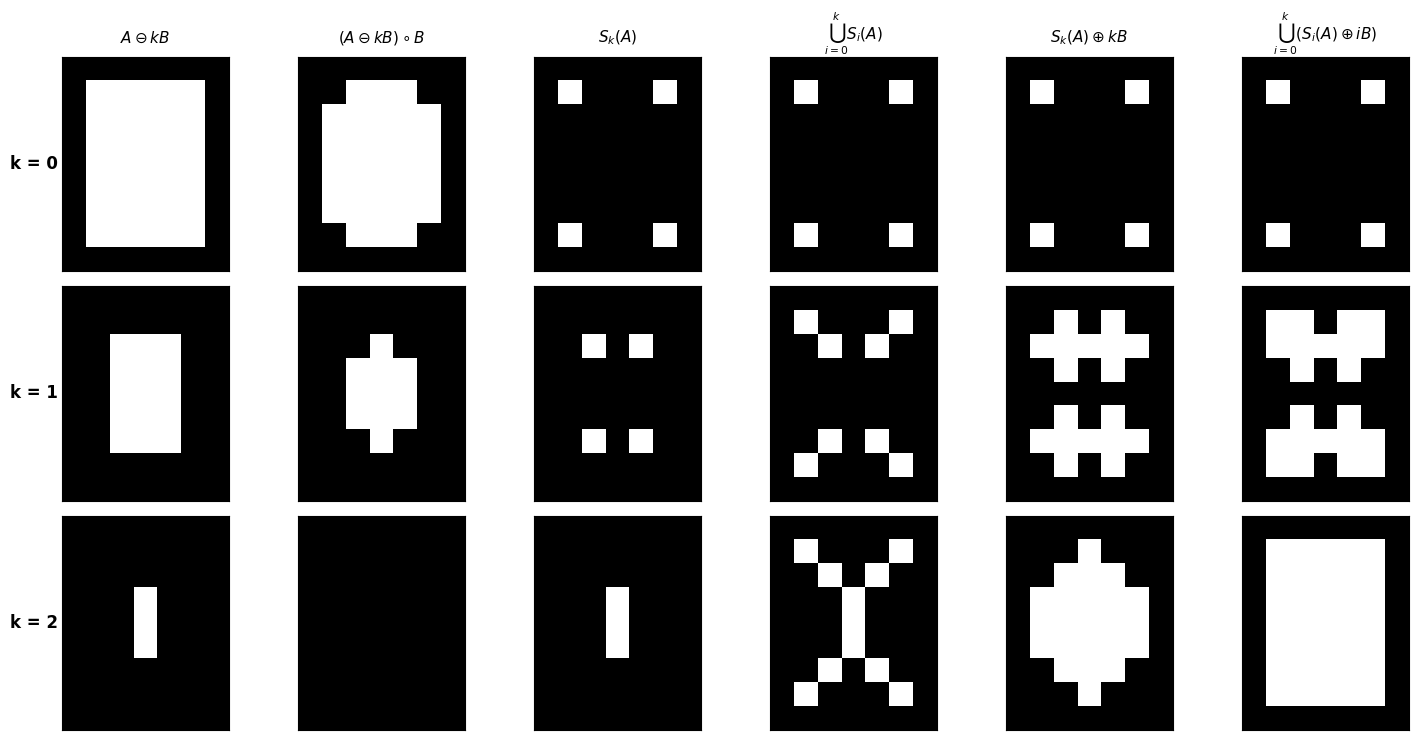


INTERPRETACJA:
• Kolumna 4 (czarna) = SZKIELET obiektu
• Kolumna 6 (ostatnia) = REKONSTRUKCJA ze szkieletu
• Porównaj: kolumna 1 w k=0 (oryginał) ≈ kolumna 6 w k=2 (rekonstrukcja)
• Algorytm jest ODWRACALNY - możemy odzyskać obiekt ze szkieletu!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

kernel_cross_3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

def visualize_skeletonization_algorithm(A, kernel, max_k=3):
    """
    Wizualizuje algorytm szkieletowania krok po kroku.
    Pokazuje 6 kolumn dla każdej iteracji k:
    1. A⊖kB - erozja
    2. (A⊖kB)∘B - otwarcie
    3. Sk(A) - składnik szkieletu
    4. ⋃Sk(A) - szkielet narastający
    5. Sk(A)⊕kB - rekonstrukcja z Sk
    6. ⋃(Si(A)⊕iB) - pełna rekonstrukcja
    
    Args:
        A (numpy.ndarray): Obraz binarny
        kernel (numpy.ndarray): Element strukturalny
        max_k (int): Maksymalna liczba iteracji
    """
    A_bin = (A > 0).astype(np.uint8) * 255

    rows = max_k
    cols = 6
    fig, axes = plt.subplots(rows, cols, figsize=(15, 2.5*rows))
    
    # Tytuły kolumn
    titles = [
        r"$A \ominus kB$",
        r"$(A \ominus kB) \circ B$",
        r"$S_k(A)$",
        r"$\bigcup_{i=0}^{k} S_i(A)$",
        r"$S_k(A) \oplus kB$",
        r"$\bigcup_{i=0}^{k} (S_i(A) \oplus iB)$"
    ]
    
    # Inicjalizacja
    Sk_union = np.zeros_like(A_bin)
    all_Sk = []

    for k in range(max_k):
        # 1. Erozja k-krotna
        if k == 0:
            eroded = A_bin.copy()
        else:
            eroded = cv2.erode(A_bin, kernel, iterations=k)
        
        # 2. Otwarcie
        opened = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, kernel)
        
        # 3. Składnik szkieletu
        Sk = cv2.subtract(eroded, opened)
        all_Sk.append(Sk.copy())
        
        # 4. Szkielet narastający
        Sk_union = cv2.bitwise_or(Sk_union, Sk)
        
        # 5. Rekonstrukcja z pojedynczego Sk
        if k > 0:
            Sk_dilated = cv2.dilate(Sk, kernel, iterations=k)
        else:
            Sk_dilated = Sk.copy()
        
        # 6. Pełna rekonstrukcja (suma wszystkich Si⊕iB)
        recon_union = np.zeros_like(A_bin)
        for i in range(k + 1):
            if i > 0:
                Si_dilated = cv2.dilate(all_Sk[i], kernel, iterations=i)
            else:
                Si_dilated = all_Sk[i].copy()
            recon_union = cv2.bitwise_or(recon_union, Si_dilated)

        # Lista obrazów do wyświetlenia
        imgs = [eroded, opened, Sk, Sk_union, Sk_dilated, recon_union]

        # Wyświetlanie
        for j in range(cols):
            ax = axes[k, j] if rows > 1 else axes[j]
            ax.imshow(imgs[j], cmap='gray', vmin=0, vmax=255, interpolation='nearest')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.grid(True, color='lightgray', linewidth=0.5, alpha=0.3)
            
            # Tytuły tylko w pierwszym wierszu
            if k == 0:
                ax.set_title(titles[j], fontsize=11, fontweight='bold', pad=10)
        
        # Etykieta wiersza
        axes[k, 0].set_ylabel(f"k = {k}", fontsize=12, fontweight='bold', 
                              rotation=0, labelpad=20, va='center')

    plt.tight_layout()
    plt.show()

# Tworzenie obrazu testowego (jak w instrukcji PDF)
# Pionowy prostokąt 5×7 pikseli
A_demo = np.zeros((9, 7), dtype=np.uint8)
A_demo[1:8, 1:6] = 255

print("Wizualizacja algorytmu szkieletowania (jak w instrukcji PDF):")
print("=" * 60)
print(f"Obraz testowy: {A_demo.shape}, {np.sum(A_demo > 0)} białych pikseli")
print(f"Element strukturalny: krzyż 3×3")
print()

visualize_skeletonization_algorithm(A_demo, kernel_cross_3, max_k=3)

print("\n" + "=" * 60)
print("INTERPRETACJA:")
print("=" * 60)
print("• Kolumna 4 (czarna) = SZKIELET obiektu")
print("• Kolumna 6 (ostatnia) = REKONSTRUKCJA ze szkieletu")
print("• Porównaj: kolumna 1 w k=0 (oryginał) ≈ kolumna 6 w k=2 (rekonstrukcja)")
print("• Algorytm jest ODWRACALNY - możemy odzyskać obiekt ze szkieletu!")
print("=" * 60)

## 2. Kod startowy <a id='kod-startowy'></a>

### 2.1 Import bibliotek


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import requests
from PIL import Image
from io import BytesIO

# Konfiguracja wyświetlania
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['image.cmap'] = 'gray'

print("✓ Biblioteki załadowane")

✓ Biblioteki załadowane


### 2.2 Funkcje pomocnicze


In [3]:
def show_images(images, titles=None, figsize=(15, 5), cmap='gray'):
    """
    Wyświetla wiele obrazów obok siebie.
    
    Args:
        images (list): Lista obrazów do wyświetlenia
        titles (list): Lista tytułów dla obrazów
        figsize (tuple): Rozmiar figury
        cmap (str): Mapa kolorów
    """
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=figsize)
    if n == 1:
        axes = [axes]
    
    for i, (img, ax) in enumerate(zip(images, axes)):
        ax.imshow(img, cmap=cmap)
        ax.axis('off')
        if titles and i < len(titles):
            ax.set_title(titles[i], fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def show_images_grid(images, titles=None, rows=2, cols=4, figsize=(15, 8), cmap='gray'):
    """
    Wyświetla obrazy w siatce.
    
    Args:
        images (list): Lista obrazów
        titles (list): Lista tytułów
        rows (int): Liczba wierszy
        cols (int): Liczba kolumn
        figsize (tuple): Rozmiar figury
        cmap (str): Mapa kolorów
    """
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, ax in enumerate(axes):
        if i < len(images):
            ax.imshow(images[i], cmap=cmap)
            if titles and i < len(titles):
                ax.set_title(titles[i], fontsize=10, fontweight='bold')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

print("✓ Funkcje pomocnicze zdefiniowane")

✓ Funkcje pomocnicze zdefiniowane


### 2.3 Pobieranie obrazów testowych z GitHub

Obrazy testowe są dostępne w repozytorium GitHub: https://github.com/kbor89/TWiPO/tree/main/images/skeleton_test_picture/


Pobieranie obrazów testowych z GitHub...

  Pobieranie rectangle_rotated.bmp... ✓ ((100, 100))
  Pobieranie test.bmp... ✓ ((100, 100))
  Pobieranie rectangle_empty.bmp... ✓ ((100, 100))
  Pobieranie rectangle_point.bmp... ✓ ((100, 100))
  Pobieranie circle.bmp... ✓ ((100, 100))
  Pobieranie circle_empty.bmp... ✓ ((100, 100))
  Pobieranie human.bmp... ✓ ((100, 100))
  Pobieranie rectangle.bmp... ✓ ((100, 100))

✓ Załadowano 8/8 obrazów

Wizualizacja obrazów testowych:


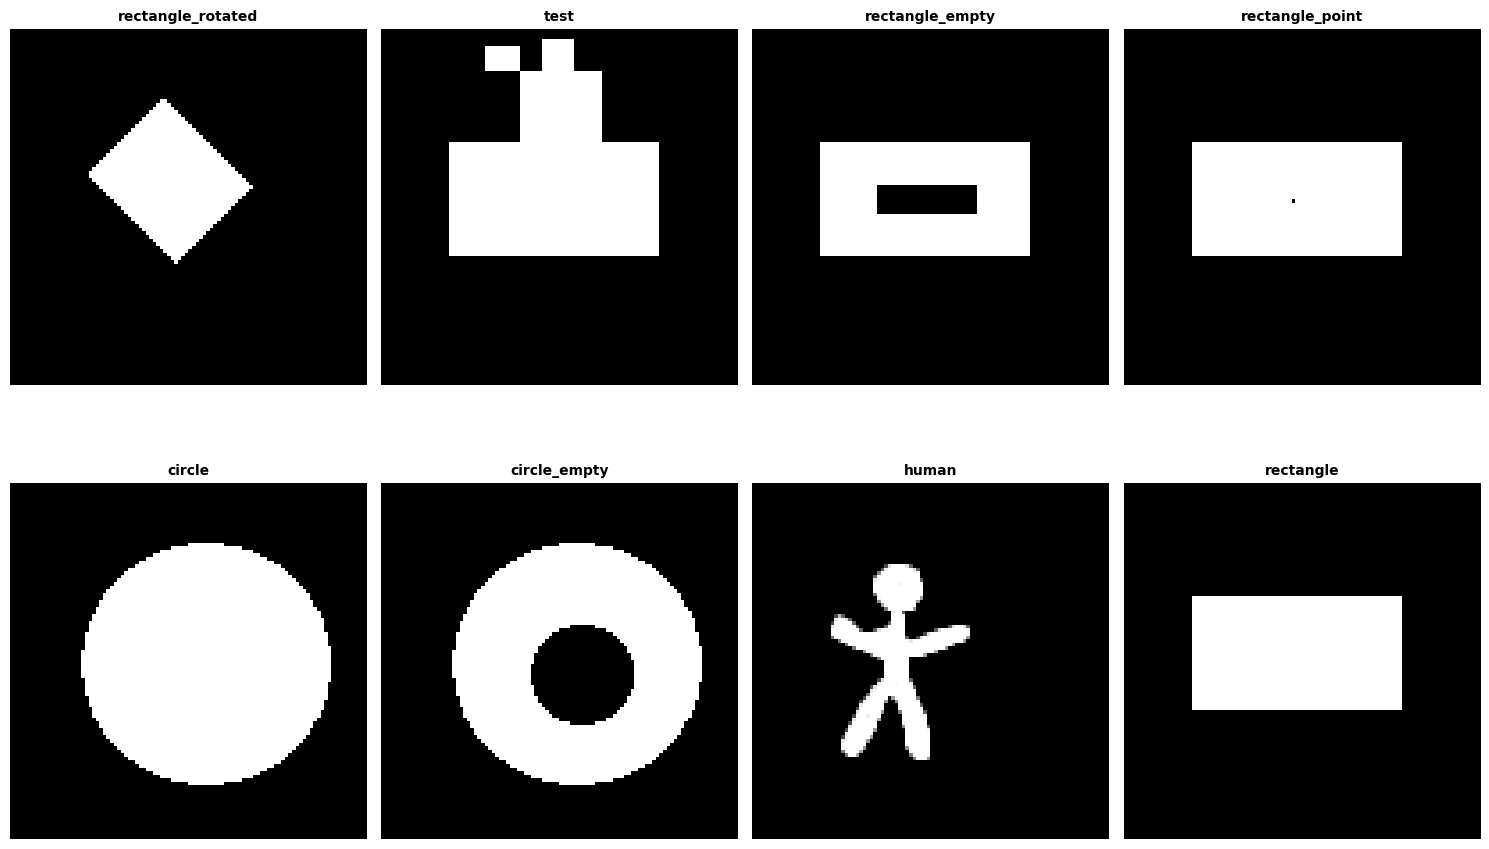

In [4]:
# Bazowy URL do repozytorium GitHub
GITHUB_BASE_URL = "https://raw.githubusercontent.com/kbor89/TWiPO/main/images/skeleton_test_picture/"

# Lista dostępnych obrazów testowych
TEST_IMAGES = [
    "rectangle_rotated.bmp",
    "test.bmp",
    "rectangle_empty.bmp",
    "rectangle_point.bmp",
    "circle.bmp",
    "circle_empty.bmp",
    "human.bmp",
    "rectangle.bmp"
]

def load_image_from_github(filename):
    """
    Pobiera obraz z repozytorium GitHub i konwertuje go na tablicę numpy.
    
    Args:
        filename (str): Nazwa pliku obrazu
        
    Returns:
        numpy.ndarray: Obraz jako tablica numpy (wartości 0 lub 255)
    """
    url = GITHUB_BASE_URL + filename
    try:
        response = requests.get(url)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content))
        # Konwersja do skali szarości i tablicy numpy
        img_array = np.array(img.convert('L'))
        return img_array
    except Exception as e:
        print(f"❌ Błąd podczas pobierania obrazu {filename}: {e}")
        return None

def load_all_test_images():
    """
    Pobiera wszystkie obrazy testowe z repozytorium.
    
    Returns:
        dict: Słownik z nazwami plików jako kluczami i tablicami numpy jako wartościami
    """
    images = {}
    print("Pobieranie obrazów testowych z GitHub...\n")
    for filename in TEST_IMAGES:
        print(f"  Pobieranie {filename}...", end=" ")
        img = load_image_from_github(filename)
        if img is not None:
            images[filename] = img
            print(f"✓ ({img.shape})")
        else:
            print("❌")
    print(f"\n✓ Załadowano {len(images)}/{len(TEST_IMAGES)} obrazów")
    return images

def display_test_images(images_dict, figsize=(15, 10)):
    """
    Wyświetla wszystkie obrazy testowe w siatce.
    
    Args:
        images_dict (dict): Słownik z obrazami
        figsize (tuple): Rozmiar figury matplotlib
    """
    n_images = len(images_dict)
    cols = 4
    rows = (n_images + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten() if n_images > 1 else [axes]
    
    for idx, (name, img) in enumerate(images_dict.items()):
        axes[idx].imshow(img, cmap='gray')
        axes[idx].set_title(name.replace('.bmp', ''), fontsize=10, fontweight='bold')
        axes[idx].axis('off')
    
    # Ukryj puste subploty
    for idx in range(n_images, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Załaduj wszystkie obrazy testowe
test_images = load_all_test_images()

# Wyświetl wszystkie obrazy
print("\nWizualizacja obrazów testowych:")
display_test_images(test_images)

### 2.4 Elementy strukturalne


In [5]:
# Definicja elementów strukturalnych
kernel_cross_3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
kernel_rect_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
kernel_rect_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
kernel_ellipse_3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
kernel_ellipse_5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

print("Elementy strukturalne:")
print("\n1. Krzyż 3×3:")
print(kernel_cross_3)
print("\n2. Kwadrat 3×3:")
print(kernel_rect_3)
print("\n3. Kwadrat 5×5:")
print(kernel_rect_5)
print("\n4. Elipsa 3×3:")
print(kernel_ellipse_3)
print("\n5. Elipsa 5×5:")
print(kernel_ellipse_5)

Elementy strukturalne:

1. Krzyż 3×3:
[[0 1 0]
 [1 1 1]
 [0 1 0]]

2. Kwadrat 3×3:
[[1 1 1]
 [1 1 1]
 [1 1 1]]

3. Kwadrat 5×5:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

4. Elipsa 3×3:
[[0 1 0]
 [1 1 1]
 [0 1 0]]

5. Elipsa 5×5:
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


## 3. Zadania do wykonania <a id='zadania'></a>

### Zadanie 1: Implementacja podstawowych operacji na obrazach

**Cel:** Zaimplementować funkcje do operacji na obrazach binarnych (odejmowanie, dodawanie, kopiowanie, czyszczenie, sprawdzanie pustości).

Te operacje są fundamentalne dla algorytmu szkieletowania.


In [ ]:
def img_subtract(img1, img2):
    """
    Odejmuje obraz img2 od img1 (różnica obrazów).
    
    Wzór: result = img1 - img2
    Dla obrazów binarnych: piksel = 255 jeśli jest w img1 ale nie w img2
    
    Args:
        img1 (numpy.ndarray): Pierwszy obraz (od którego odejmujemy)
        img2 (numpy.ndarray): Drugi obraz (który odejmujemy)
        
    Returns:
        numpy.ndarray: Różnica obrazów
    """
    # TODO: Zaimplementuj odejmowanie obrazów
    # Wskazówka: użyj cv2.subtract() lub operacji numpy
    # Upewnij się, że wynik jest w zakresie [0, 255]
    
    pass

def img_add(img1, img2):
    """
    Dodaje dwa obrazy (suma obrazów).
    
    Wzór: result = img1 + img2
    Dla obrazów binarnych: logiczne OR (piksel = 255 jeśli jest w img1 lub img2)
    
    Args:
        img1 (numpy.ndarray): Pierwszy obraz
        img2 (numpy.ndarray): Drugi obraz
        
    Returns:
        numpy.ndarray: Suma obrazów
    """
    # TODO: Zaimplementuj dodawanie obrazów
    # Wskazówka: użyj cv2.add() lub cv2.bitwise_or() dla obrazów binarnych
    
    pass

def img_copy(img):
    """
    Tworzy kopię obrazu.
    
    Args:
        img (numpy.ndarray): Obraz do skopiowania
        
    Returns:
        numpy.ndarray: Kopia obrazu
    """
    # TODO: Zaimplementuj kopiowanie obrazu
    # Wskazówka: użyj img.copy() lub np.copy()
    
    pass

def img_clear(img):
    """
    Czyści obraz (wypełnia zerami).
    
    Args:
        img (numpy.ndarray): Obraz do wyczyszczenia
        
    Returns:
        numpy.ndarray: Wyczyszczony obraz (same zera)
    """
    # TODO: Zaimplementuj czyszczenie obrazu
    # Wskazówka: użyj np.zeros_like()
    
    pass

def is_img_empty(img):
    """
    Sprawdza, czy obraz jest pusty (wszystkie piksele = 0).
    
    Args:
        img (numpy.ndarray): Obraz do sprawdzenia
        
    Returns:
        bool: True jeśli obraz jest pusty, False w przeciwnym przypadku
    """
    # TODO: Zaimplementuj sprawdzanie pustości obrazu
    # Wskazówka: użyj np.sum() lub np.any()
    
    pass

#### Test funkcji operacji na obrazach


In [ ]:
# Test operacji na obrazach
if 'rectangle.bmp' in test_images and 'circle.bmp' in test_images:
    img_rect = test_images['rectangle.bmp']
    img_circle = test_images['circle.bmp']
    
    # Test odejmowania
    img_diff = img_subtract(img_rect, img_circle)
    
    # Test dodawania
    img_sum = img_add(img_rect, img_circle)
    
    # Test kopiowania
    img_copy_test = img_copy(img_rect)
    
    # Test czyszczenia
    img_cleared = img_clear(img_rect)
    
    # Test sprawdzania pustości
    is_empty_rect = is_img_empty(img_rect)
    is_empty_cleared = is_img_empty(img_cleared)
    
    print("Testy operacji na obrazach:")
    print(f"  Prostokąt pusty? {is_empty_rect}")
    print(f"  Wyczyszczony obraz pusty? {is_empty_cleared}")
    
    if img_diff is not None and img_sum is not None:
        show_images([img_rect, img_circle, img_diff, img_sum],
                    ['Prostokąt', 'Okrąg', 'Różnica (rect - circle)', 'Suma (rect + circle)'],
                    figsize=(16, 4))
else:
    print("Obrazy testowe nie zostały załadowane")

### Zadanie 2: Implementacja algorytmu szkieletowania (wersja iteracyjna)

**Cel:** Zaimplementować algorytm szkieletowania zgodnie z pseudokodem z sekcji teoretycznej.

Algorytm:
```
1. skeleton = pusty obraz
2. eroded = kopia obrazu oryginalnego
3. Dopóki eroded nie jest pusty:
   a) opened = otwarcie(eroded)
   b) component = eroded - opened
   c) skeleton = skeleton + component
   d) eroded = erozja(eroded)
4. Zwróć skeleton
```


In [ ]:
def skeletonize_iterative(image, kernel, max_iterations=100):
    """
    Wykonuje szkieletowanie obrazu binarnego (wersja iteracyjna).
    
    Algorytm:
    1. Inicjalizacja: skeleton = 0, eroded = image
    2. Dopóki eroded nie jest pusty:
       - opened = otwarcie(eroded)
       - component = eroded - opened
       - skeleton = skeleton + component
       - eroded = erozja(eroded)
    
    Args:
        image (numpy.ndarray): Obraz binarny (0 lub 255)
        kernel (numpy.ndarray): Element strukturalny
        max_iterations (int): Maksymalna liczba iteracji (zabezpieczenie)
        
    Returns:
        tuple: (szkielet, liczba iteracji)
    """
    # TODO: Zaimplementuj algorytm szkieletowania
    
    # Krok 1: Inicjalizacja
    # skeleton = img_clear(image)  # pusty obraz
    # eroded = img_copy(image)     # kopia obrazu
    
    # Krok 2: Pętla główna
    # iteration = 0
    # while not is_img_empty(eroded) and iteration < max_iterations:
    #     a) opened = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, kernel)
    #     b) component = img_subtract(eroded, opened)
    #     c) skeleton = img_add(skeleton, component)
    #     d) eroded = cv2.erode(eroded, kernel, iterations=1)
    #     iteration += 1
    
    # return skeleton, iteration
    
    pass

#### Test algorytmu szkieletowania


In [ ]:
# Test szkieletowania
if 'rectangle.bmp' in test_images:
    test_img = test_images['rectangle.bmp']
    
    skeleton, num_iter = skeletonize_iterative(test_img, kernel_cross_3)
    
    if skeleton is not None:
        print(f"Szkieletowanie zakończone po {num_iter} iteracjach")
        
        show_images([test_img, skeleton],
                    ['Obraz oryginalny', f'Szkielet ({num_iter} iteracji)'],
                    figsize=(10, 5))
else:
    print("Obraz rectangle.bmp nie został załadowany")

### Zadanie 3: Testowanie na wszystkich obrazach

**Cel:** Przetestować algorytm szkieletowania na wszystkich dostępnych obrazach testowych.


In [ ]:
# ROZWIĄZANIE - Testowanie na wszystkich obrazach

def test_skeletonization_on_all_images(images_dict, kernel):
    """
    Testuje szkieletowanie na wszystkich obrazach.
    """
    results = {}
    
    for name, img in images_dict.items():
        print(f"\nPrzetwarzanie: {name}")
        skeleton, num_iter = skeletonize_iterative(img, kernel)
        
        results[name] = {
            'original': img,
            'skeleton': skeleton,
            'iterations': num_iter
        }
        
        print(f"  Iteracje: {num_iter}")
        print(f"  Pikseli szkieletu: {np.sum(skeleton > 0)}")
    
    return results

print("✓ Funkcja testowania zaimplementowana")

# Test
print("=" * 60)
print("TESTOWANIE SZKIELETOWANIA NA WSZYSTKICH OBRAZACH")
print("=" * 60)

results = test_skeletonization_on_all_images(test_images, kernel_cross_3)

# Wizualizacja wyników
if results:
    print("\n" + "=" * 60)
    print("WIZUALIZACJA WYNIKÓW")
    print("=" * 60)
    
    for name, data in results.items():
        print(f"\n{name}:")
        show_images([data['original'], data['skeleton']],
                    [f'{name} - Oryginał', f'Szkielet ({data["iterations"]} iter.)'],
                    figsize=(10, 5))

### Zadanie 4: Analiza wpływu elementu strukturalnego

**Cel:** Zbadać, jak różne elementy strukturalne wpływają na wynik szkieletowania.


In [ ]:
# ROZWIĄZANIE - Porównanie elementów strukturalnych

def compare_kernels(image, kernels, kernel_names):
    """
    Porównuje wyniki szkieletowania dla różnych elementów strukturalnych.
    """
    skeletons = []
    titles = []
    
    for kernel, name in zip(kernels, kernel_names):
        skeleton, num_iter = skeletonize_iterative(image, kernel)
        skeletons.append(skeleton)
        titles.append(f'{name}\n({num_iter} iter.)')
        print(f"{name}: {num_iter} iteracji, {np.sum(skeleton > 0)} pikseli")
    
    # Dodaj oryginał na początku
    skeletons.insert(0, image)
    titles.insert(0, 'Oryginał')
    
    show_images(skeletons, titles, figsize=(18, 4))

print("✓ Funkcja porównania kerneli zaimplementowana")

# Test dla prostokąta
if 'rectangle.bmp' in test_images:
    print("\nPorównanie elementów strukturalnych dla prostokąta:")
    print("=" * 60)
    
    kernels = [kernel_cross_3, kernel_rect_3, kernel_ellipse_3]
    names = ['Krzyż 3×3', 'Kwadrat 3×3', 'Elipsa 3×3']
    
    compare_kernels(test_images['rectangle.bmp'], kernels, names)

### Zadanie 5: Analiza przypadku specjalnego - prostokąt z pustym obszarem

**Cel:** Odpowiedzieć na pytanie: *Jak będzie wyglądał wynik szkieletowania dla prostokąta z pustym obszarem wewnątrz?*


In [ ]:
# Analiza prostokąta z pustym obszarem (rama)
if 'rectangle_empty.bmp' in test_images:
    print("Analiza prostokąta z pustym obszarem wewnątrz (rama):")
    print("=" * 60)
    
    img_empty = test_images['rectangle_empty.bmp']
    
    # Szkieletowanie
    skeleton, num_iter = skeletonize_iterative(img_empty, kernel_cross_3)
    
    print(f"Liczba iteracji: {num_iter}")
    print(f"Liczba pikseli szkieletu: {np.sum(skeleton > 0)}")
    
    # Porównanie z pełnym prostokątem
    if 'rectangle.bmp' in test_images:
        img_full = test_images['rectangle.bmp']
        skeleton_full, num_iter_full = skeletonize_iterative(img_full, kernel_cross_3)
        
        print(f"\nProstokąt pełny: {num_iter_full} iteracji, {np.sum(skeleton_full > 0)} pikseli")
        print(f"Prostokąt pusty: {num_iter} iteracji, {np.sum(skeleton > 0)} pikseli")
        
        print("\nPorównanie: prostokąt pełny vs. prostokąt pusty:")
        show_images([img_full, skeleton_full, img_empty, skeleton],
                    ['Prostokąt pełny', 'Szkielet pełny', 
                     'Prostokąt pusty (rama)', 'Szkielet ramy'],
                    figsize=(16, 4))
    
    print("\n" + "=" * 60)
    print("WNIOSKI:")
    print("=" * 60)
    print("")
    print("Dla prostokąta z pustym obszarem wewnątrz (rama):")
    print("1. Szkielet składa się z dwóch równoległych linii")
    print("2. Linie przebiegają przez środki ścian ramy")
    print("3. Szkielet zachowuje topologię obiektu (zamknięty kontur)")
    print("4. Różni się od szkieletu pełnego prostokąta (pojedyncza linia)")
    print("5. Liczba iteracji jest mniejsza niż dla pełnego prostokąta")
    print("")
else:
    print("Obraz rectangle_empty.bmp nie został załadowany")

### Zadanie 6: Wizualizacja procesu szkieletowania krok po kroku

**Cel:** Stworzyć wizualizację pokazującą, jak szkielet jest budowany iteracyjnie.


In [ ]:
# ROZWIĄZANIE - Wizualizacja procesu szkieletowania

def visualize_skeletonization_process(image, kernel, max_steps=10):
    """
    Wizualizuje proces szkieletowania krok po kroku.
    """
    print("Proces szkieletowania krok po kroku:")
    print("=" * 60)
    
    skeleton = img_clear(image)
    eroded = img_copy(image)
    
    images_to_show = []
    titles_to_show = []
    
    iteration = 0
    while not is_img_empty(eroded) and iteration < max_steps:
        # Otwarcie
        opened = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, kernel)
        
        # Składnik szkieletu
        component = img_subtract(eroded, opened)
        
        # Dodaj do szkieletu
        skeleton = img_add(skeleton, component)
        
        # Zapisz do wizualizacji
        images_to_show.append(skeleton.copy())
        titles_to_show.append(f'Iteracja {iteration}')
        
        print(f"Iteracja {iteration}: dodano {np.sum(component > 0)} pikseli")
        
        # Erozja dla następnej iteracji
        eroded = cv2.erode(eroded, kernel, iterations=1)
        iteration += 1
    
    # Wizualizacja
    if images_to_show:
        n_show = min(12, len(images_to_show))
        show_images_grid(images_to_show[:n_show], titles_to_show[:n_show], 
                        rows=3, cols=4, figsize=(16, 12))

print("✓ Funkcja wizualizacji procesu zaimplementowana")

# Test
if 'human.bmp' in test_images:
    print("\nWizualizacja procesu dla kształtu człowieka:")
    visualize_skeletonization_process(test_images['human.bmp'], kernel_cross_3, max_steps=12)

## 4. Przykłady użycia <a id='przyklady'></a>

### 4.1 Porównanie z algorytmem Zhang-Suen (OpenCV)


In [ ]:
def zhang_suen_skeletonization(image):
    """
    Szkieletowanie algorytmem Zhang-Suen (OpenCV).
    
    Args:
        image (numpy.ndarray): Obraz binarny
        
    Returns:
        numpy.ndarray: Szkielet
    """
    # Normalizacja do 0 i 1
    img_normalized = (image > 0).astype(np.uint8)
    
    # Szkieletowanie Zhang-Suen
    try:
        skeleton = cv2.ximgproc.thinning(img_normalized, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)
        return skeleton * 255
    except:
        print("Moduł cv2.ximgproc niedostępny. Instalacja: pip install opencv-contrib-python")
        return None

# Porównanie algorytmów
if 'human.bmp' in test_images:
    print("\nPorównanie metod szkieletowania:")
    print("=" * 60)
    
    img = test_images['human.bmp']
    
    # Metoda morfologiczna
    skeleton_morph, num_iter = skeletonize_iterative(img, kernel_cross_3)
    print(f"Metoda morfologiczna: {num_iter} iteracji, {np.sum(skeleton_morph > 0)} pikseli")
    
    # Metoda Zhang-Suen
    skeleton_zs = zhang_suen_skeletonization(img)
    
    if skeleton_zs is not None:
        print(f"Metoda Zhang-Suen: {np.sum(skeleton_zs > 0)} pikseli")
        show_images([img, skeleton_morph, skeleton_zs],
                    ['Oryginał', 'Szkielet morfologiczny', 'Szkielet Zhang-Suen'],
                    figsize=(15, 5))
    else:
        show_images([img, skeleton_morph],
                    ['Oryginał', 'Szkielet morfologiczny'],
                    figsize=(10, 5))

### 4.2 Analiza topologii szkieletu


In [ ]:
def analyze_skeleton_topology(skeleton):
    """
    Analizuje topologię szkieletu (punkty końcowe, rozgałęzienia).
    
    Args:
        skeleton (numpy.ndarray): Szkielet binarny
        
    Returns:
        dict: Informacje o topologii
    """
    # Normalizacja do 0 i 1
    skel = (skeleton > 0).astype(np.uint8)
    
    # Kernel do liczenia sąsiadów
    kernel = np.ones((3, 3), dtype=np.uint8)
    kernel[1, 1] = 0
    
    # Liczba sąsiadów dla każdego piksela
    neighbors = cv2.filter2D(skel, -1, kernel)
    
    # Punkty końcowe (1 sąsiad)
    endpoints = ((neighbors == 1) & (skel == 1)).astype(np.uint8) * 255
    
    # Punkty rozgałęzienia (3+ sąsiadów)
    junctions = ((neighbors >= 3) & (skel == 1)).astype(np.uint8) * 255
    
    # Punkty regularne (2 sąsiadów)
    regular = ((neighbors == 2) & (skel == 1)).astype(np.uint8) * 255
    
    return {
        'endpoints': endpoints,
        'junctions': junctions,
        'regular': regular,
        'n_endpoints': np.sum(endpoints > 0),
        'n_junctions': np.sum(junctions > 0),
        'n_regular': np.sum(regular > 0)
    }

# Test
if 'human.bmp' in test_images:
    img = test_images['human.bmp']
    skeleton, _ = skeletonize_iterative(img, kernel_cross_3)
    
    topology = analyze_skeleton_topology(skeleton)
    
    print("\nAnaliza topologii szkieletu:")
    print("=" * 60)
    print(f"Punkty końcowe: {topology['n_endpoints']}")
    print(f"Punkty rozgałęzienia: {topology['n_junctions']}")
    print(f"Punkty regularne: {topology['n_regular']}")
    
    show_images([img, skeleton, topology['endpoints'], topology['junctions']],
                ['Oryginał', 'Szkielet', 'Punkty końcowe', 'Rozgałęzienia'],
                figsize=(16, 4))

### 4.3 Pomiar długości obiektu


In [ ]:
def measure_object_length(skeleton):
    """
    Mierzy długość obiektu na podstawie szkieletu.
    
    Args:
        skeleton (numpy.ndarray): Szkielet binarny
        
    Returns:
        float: Długość szkieletu w pikselach
    """
    # Liczba pikseli szkieletu
    n_pixels = np.sum(skeleton > 0)
    
    return n_pixels

# Test dla wszystkich obrazów
print("\nPomiar długości obiektów:")
print("=" * 60)
print(f"{'Nazwa obrazu':<25} {'Długość szkieletu':>18} {'Pole obiektu':>15}")
print("=" * 60)

for name, img in test_images.items():
    skeleton, _ = skeletonize_iterative(img, kernel_cross_3)
    length = measure_object_length(skeleton)
    area = np.sum(img > 0)
    
    print(f"{name:<25} {length:>15.0f} px {area:>15.0f} px²")

### 4.4 Porównanie wszystkich obrazów testowych


In [ ]:
# Stwórz kompletne porównanie wszystkich obrazów
print("\nKompletne porównanie wszystkich obrazów testowych:")
print("=" * 60)

all_originals = []
all_skeletons = []
all_titles_orig = []
all_titles_skel = []

for name, img in test_images.items():
    skeleton, num_iter = skeletonize_iterative(img, kernel_cross_3)
    
    all_originals.append(img)
    all_skeletons.append(skeleton)
    all_titles_orig.append(name.replace('.bmp', ''))
    all_titles_skel.append(f'{name.replace(".bmp", "")}\n({num_iter} iter.)')

# Wyświetl oryginały
print("\nObrazy oryginalne:")
show_images_grid(all_originals, all_titles_orig, rows=2, cols=4, figsize=(16, 8))

# Wyświetl szkielety
print("\nSzkielety:")
show_images_grid(all_skeletons, all_titles_skel, rows=2, cols=4, figsize=(16, 8))

## 5. Podsumowanie <a id='podsumowanie'></a>

### 5.1 Kluczowe wnioski

W tym laboratorium poznaliśmy:

1. **Operacje na obrazach binarnych:**
   - Odejmowanie: `img1 - img2` (piksele w img1, ale nie w img2)
   - Dodawanie: `img1 + img2` (logiczne OR)
   - Kopiowanie, czyszczenie, sprawdzanie pustości

2. **Algorytm szkieletowania (wersja iteracyjna):**
   ```
   skeleton = 0
   eroded = image
   while eroded nie jest pusty:
       opened = otwarcie(eroded)
       component = eroded - opened
       skeleton = skeleton + component
       eroded = erozja(eroded)
   ```

3. **Właściwości szkieletu:**
   - Cienki (1 piksel grubości)
   - Centralny (przebiega przez środek obiektu)
   - Zachowuje topologię
   - Zależy od elementu strukturalnego

4. **Wpływ elementu strukturalnego:**
   - Krzyż: najbardziej oszczędny szkielet
   - Kwadrat: bardziej "kanciasty" szkielet
   - Elipsa: bardziej "zaokrąglony" szkielet

5. **Przypadki specjalne:**
   - **Prostokąt pełny:** szkielet to linia środkowa
   - **Prostokąt pusty (rama):** szkielet to dwie równoległe linie
   - **Okrąg:** szkielet to punkt środkowy
   - **Pierścień:** szkielet to okrąg pośrodku grubości
   - **Kształt człowieka:** szkielet przypomina "patyczaka"

### 5.2 Zastosowania praktyczne

- **Rozpoznawanie znaków (OCR):** uproszczenie kształtu liter
- **Analiza kształtu:** ekstrakcja cech geometrycznych
- **Planowanie ścieżek:** wyznaczanie tras w robotyce
- **Analiza obrazów medycznych:** naczynia krwionośne, neurony
- **GIS:** analiza sieci dróg, rzek
- **Biometria:** analiza linii papilarnych

### 5.3 Porównanie z innymi metodami

| Metoda | Zalety | Wady |
|--------|--------|------|
| **Morfologiczna (iteracyjna)** | Prosta implementacja, intuicyjna | Wolniejsza, zależna od SE |
| **Morfologiczna (z rekonstrukcją)** | Odwracalna | Wymaga przechowywania składników |
| **Zhang-Suen** | Szybka, cienki szkielet | Nieodwracalna, może tworzyć artefakty |
| **Medial Axis** | Geometrycznie dokładna | Wrażliwa na szum |

### 5.4 Najważniejsze wzory

**Odejmowanie obrazów:**
$$C(x,y) = \max(0, A(x,y) - B(x,y))$$

**Dodawanie obrazów:**
$$C(x,y) = A(x,y) \lor B(x,y)$$

**Składnik szkieletu:**
$$S_k(A) = (A \ominus kB) - [(A \ominus kB) \circ B]$$

**Szkielet:**
$$S(A) = \bigcup_{k=0}^{M} S_k(A)$$

### 5.5 Implementacja w C++ vs Python

Algorytm zaimplementowany w tym laboratorium jest bezpośrednim tłumaczeniem algorytmu z C++:

| C++ | Python |
|-----|--------|
| `doImgSub(img1, img2, out)` | `img_subtract(img1, img2)` |
| `doImgAdd(img1, img2, out)` | `img_add(img1, img2)` |
| `doImgCopy(in, out)` | `img_copy(img)` |
| `doImgClear(img)` | `img_clear(img)` |
| `isImgEmpty(img)` | `is_img_empty(img)` |
| `doErosion(in, out, kernel)` | `cv2.erode(img, kernel)` |
| `doOpening(in, out, kernel)` | `cv2.morphologyEx(img, MORPH_OPEN, kernel)` |

### 5.6 Dalsze kierunki

- **Pruning (przycinanie)** - usuwanie niepotrzebnych gałęzi szkieletu
- **Analiza topologii** - detekcja punktów końcowych i rozgałęzień
- **Szkieletowanie 3D** - rozszerzenie na obrazy objętościowe
- **Szkieletowanie adaptacyjne** - dostosowanie do lokalnych właściwości obrazu
- **Rekonstrukcja z zachowaniem składników** - pełna odwracalność

---

